#  The Spark Foundation : Data Science and Business Analytics Internship
### Task 1 : Prediction using Supervised Machine Learing Problem
### Statement : Predict the percentage of an student based on the no. of study hours
### Author : Shaha Vishant Viram
### Step 1 : Processing the Dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("C:/Users/vishu/Desktop/student_scores/student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.shape

(25, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


#### Mean average of study hours is 5 hours, minimum study 1 hour and maximum study hours are 9 hours
#### Mean average of score is 51%, minimum score is 17% and maximum score is 95%

In [12]:
# To check missing values in data
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in dataset so we move forward to our next step

# Step 2: Visualizing the data
#### To check relationship between the two variables linear regression very effective uesd to predict the scors based on the number of hours.

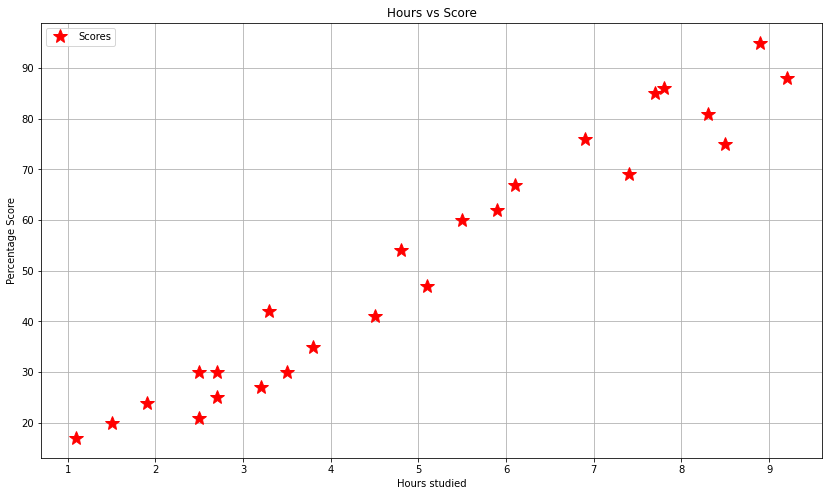

In [13]:
plt.rcParams["figure.figsize"]=[14,8]
data.plot(x='Hours',y='Scores',style='*',color='red',markersize=15)
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

#### From above graph we can see that their is linear relationship between "Hours studied and score" we can further use supervised machine learing model for further prediction

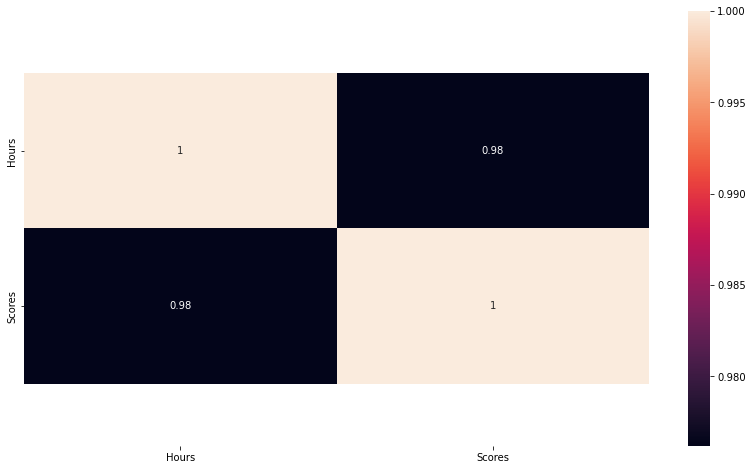

In [14]:
# To find correlation between two variables
ax=sns.heatmap(data.corr(),annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.4,top-0.4)
plt.show()

#### From above heatmap it is observed that their is positive correlation between hours studied and scores of students

## Step 3: Data Preperation

In [15]:
# Dividing the data in training and testing data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [18]:
# Dividing the dataset
x = data.iloc[:,:1].values


In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [22]:
y = data.iloc[:,1:].values

In [23]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Step 4: Training the Model 

In [25]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Step 5: Visualize the Model 

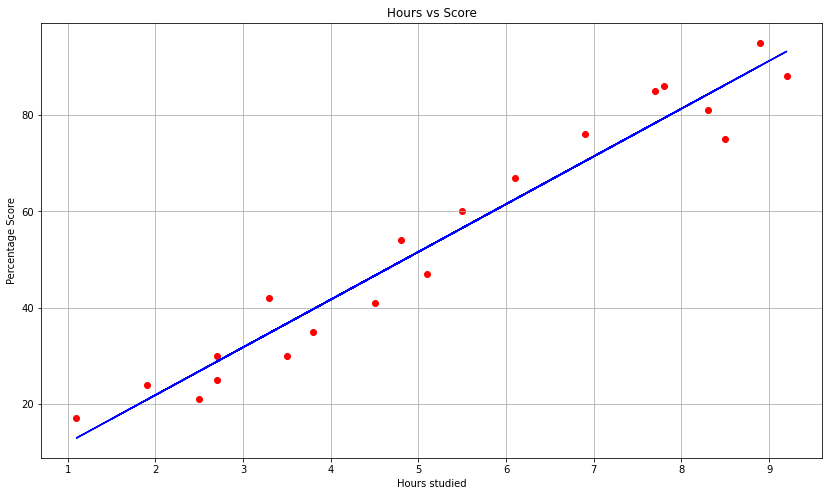

In [26]:
# Plotting the training dataset
line = model.coef_*x + model.intercept_
plt.rcParams["figure.figsize"]=[14,8]
plt.scatter(x_train, y_train, color='red')
plt.plot(x,line,color = 'blue')
plt.title('Hours vs Score')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

#### From above graph the line give us quit good prediction about testing dataset

## Step 6: Prediction for training and testing dataset 

In [27]:
print(x_test)
y_pred = model.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [28]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [29]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [30]:
# To compare actual and predicted value
comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398037], [33.73226077948984], [7..."


In [31]:
# Testing with original data
hours = 9.25
own_pred = model.predict([[hours]])
print("The predicted score for if a student studied for","hours is",own_pred[0])

The predicted score for if a student studied for hours is [93.69173249]


#### Therefore,if a student studied for 9.25 hours then the predicted score of student is 93.6917 